<a href="https://colab.research.google.com/github/Twixx10/MachineLearningTASK/blob/main/Week9/Classification_model_SVM_Classification_M_Rakan_Bagus_11103213162.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classification model: SVM Classification

In [4]:
# Import library untuk menghubungkan Google Drive
from google.colab import drive

# Menghubungkan Google Drive
drive.mount('/content/drive')

# Path ke dataset di Google Drive
dataset_path = '/content/drive/MyDrive/Machine Learning/Dataset/MaterialStrength.csv'  # Ganti dengan path dataset Anda


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Membaca Dataset

In [5]:
# Import library untuk membaca data
import pandas as pd

# Membaca dataset
data = pd.read_csv(dataset_path)

# Menampilkan 5 baris pertama
print(data.head())

# Informasi dasar tentang dataset
print(data.info())
print(data.describe())


      x1     x2   x3     x4   x5      x6     x7   x8        x9    x10  \
0  540.0    0.0  0.0  162.0  2.5  1040.0  676.0   28  0.300000  540.0   
1  540.0    0.0  0.0  162.0  2.5  1055.0  676.0   28  0.300000  540.0   
2  332.5  142.5  0.0  228.0  0.0   932.0  594.0  270  0.685714  475.0   
3  332.5  142.5  0.0  228.0  0.0   932.0  594.0  365  0.685714  475.0   
4  198.6  132.4  0.0  192.0  0.0   978.4  825.5  360  0.966767  331.0   

        x11  x12       x13  x14  x15  target_feature  
0  1.538462    1  0.350044  YEs   NO           79.99  
1  1.560651    1  0.452416  yES  nOO           61.89  
2  1.569024    0  6.704743  yEs   NO           40.27  
3  1.569024    0  8.891596  yes  NOO           41.05  
4  1.185221    0  8.126411  YeS   no           44.30  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x1              1030 non-null

#Preprocessing Data

In [6]:
from sklearn.preprocessing import LabelEncoder

# Normalisasi kolom kategorikal
data['x14'] = data['x14'].str.lower().str.strip()
data['x15'] = data['x15'].str.lower().str.strip()

# Encoding kolom kategorikal (x14 dan x15)
label_encoder = LabelEncoder()
data['x14'] = label_encoder.fit_transform(data['x14'])
data['x15'] = label_encoder.fit_transform(data['x15'])

# Mengubah target menjadi biner
data['target_feature'] = (data['target_feature'] > 50).astype(int)

# Memisahkan fitur dan target
X = data.drop(columns=['target_feature'])
y = data['target_feature']


# Membagi Dataset dan Standarisasi

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Membagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Membuat Model Klasifikasi SVM

In [8]:
from sklearn.svm import SVC

# Membuat model SVM
svm_classifier = SVC(kernel='rbf', probability=True, random_state=42)

# Melatih model
svm_classifier.fit(X_train, y_train)


SVC(probability=True, random_state=42)

#Evaluasi Model

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.90       162
           1       0.67      0.41      0.51        44

    accuracy                           0.83       206
   macro avg       0.76      0.68      0.70       206
weighted avg       0.81      0.83      0.81       206

AUC Score: 0.93


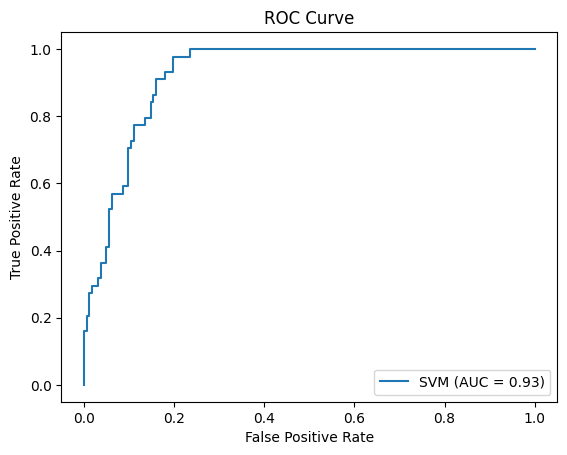

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Prediksi
y_pred = svm_classifier.predict(X_test)
y_prob = svm_classifier.predict_proba(X_test)[:, 1]

# Evaluasi model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# AUC-ROC
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
plt.plot(fpr, tpr, label=f"SVM (AUC = {auc_score:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


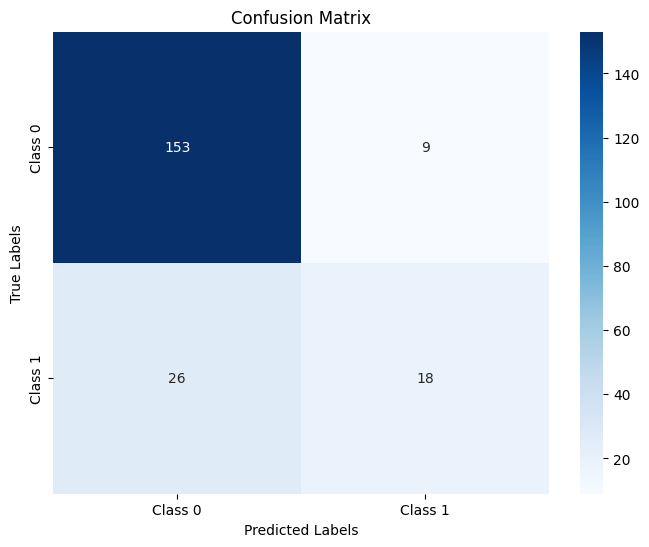

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi ulang jika y_pred belum ada
y_pred = svm_classifier.predict(X_test)

# Plot confusion matrix sebagai heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


#Hyperparameter tuning

In [10]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

# Grid Search
grid_search = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Model terbaik
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluasi ulang dengan model terbaik
y_pred_best = best_model.predict(X_test)
print("Classification Report (Best Model):")
print(classification_report(y_test, y_pred_best))


Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       162
           1       1.00      0.77      0.87        44

    accuracy                           0.95       206
   macro avg       0.97      0.89      0.92       206
weighted avg       0.95      0.95      0.95       206

